In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('used_car_dataset.csv')
df.head()


C:\Users\SONY\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,publication_datetime,publication_history,location,provider,manufacturer,model,note,price_sek,price_history,...,electric_range_km,number_of_seats,car_type,length_mm,width_mm,height_mm,load_capacity_kg,empty_weight_kg,total_weight_kg,url
0,0,2021-03-17 00:00:00,NaN,Nora,RS Bilar AB,Peugeot,207,CC 1.6 VTi 120hk/ Endast 2 brukare,49900,NaN,...,NaN,NaN,Cab,NaN,NaN,NaN,NaN,NaN,NaN,/orebro/peugeot_207_cc_1_6_vti_120hk__endast_2...
1,1,2021-03-17 00:00:00,NaN,Ale,Auto Center West AB,Opel,Meriva,"1.3 CDTI, PDC Fram och Bak",79500,NaN,...,NaN,NaN,hatchback,NaN,NaN,NaN,NaN,NaN,NaN,/alvsborg/opel_meriva_1_3_cdti__pdc_fram_och_b...
2,2,2021-03-20 00:00:00,NaN,Ronneby,Maree s Bilar AB,BMW,M5,Sedan Automat 560hk V-Max S-såld Taklucka,309900,NaN,...,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,NaN,NaN,/blekinge/bmw_m5_sedan_automat_560hk_v_max_s_s...
3,3,2021-03-20 00:00:00,NaN,Norrköping,BilByter AB,Hyundai,i20,1.0 T-GDI 100hk Mild Hybrid Essential,186400,NaN,...,NaN,NaN,hatchback,NaN,NaN,NaN,NaN,NaN,NaN,/ostergotland/hyundai_i20_1_0_t_gdi_100hk_mild...
4,4,2021-03-20 00:00:00,NaN,Hisingen,Göte Carlsson i Göteborg AB,Opel,Combo-e,Kampanj Premium L2 50KW 136hk,538130,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/goteborg/opel_combo_e_kampanj_premium_l2_50kw...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134243 entries, 0 to 134242
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        134243 non-null  int64  
 1   publication_datetime              134243 non-null  object 
 2   publication_history               33874 non-null   object 
 3   location                          133805 non-null  object 
 4   provider                          134243 non-null  object 
 5   manufacturer                      134243 non-null  object 
 6   model                             134243 non-null  object 
 7   note                              133671 non-null  object 
 8   price_sek                         134243 non-null  int64  
 9   price_history                     33885 non-null   object 
 10  entry_year                        134243 non-null  int64  
 11  fuel                              133981 non-null  o

In [4]:
# For finding the most day for publication the advertisement
df['publication_datetime_int'] = pd.to_datetime(df['publication_datetime'])
#df['Date_time'] = df['publication_datetime'].astype('datetime64[ns]')

df['publication_months'] = df['publication_datetime_int'].dt.month_name()
df['publication_days'] = df['publication_datetime_int'].dt.day_name()


df['publication_hours'] = df.publication_datetime_int.dt.hour
df['publication_minutes'] = df.publication_datetime_int.dt.minute
df.head()

,Unnamed: 0,publication_datetime,publication_history,location,provider,manufacturer,model,note,price_sek,price_history,...,height_mm,load_capacity_kg,empty_weight_kg,total_weight_kg,url,publication_datetime_int,publication_months,publication_days,publication_hours,publication_minutes
0,0,2021-03-17 00:00:00,NaN,Nora,RS Bilar AB,Peugeot,207,CC 1.6 VTi 120hk/ Endast 2 brukare,49900,NaN,...,NaN,NaN,NaN,NaN,/orebro/peugeot_207_cc_1_6_vti_120hk__endast_2...,2021-03-17,March,Wednesday,0,0
1,1,2021-03-17 00:00:00,NaN,Ale,Auto Center West AB,Opel,Meriva,"1.3 CDTI, PDC Fram och Bak",79500,NaN,...,NaN,NaN,NaN,NaN,/alvsborg/opel_meriva_1_3_cdti__pdc_fram_och_b...,2021-03-17,March,Wednesday,0,0
2,2,2021-03-20 00:00:00,NaN,Ronneby,Maree s Bilar AB,BMW,M5,Sedan Automat 560hk V-Max S-såld Taklucka,309900,NaN,...,NaN,NaN,NaN,NaN,/blekinge/bmw_m5_sedan_automat_560hk_v_max_s_s...,2021-03-20,March,Saturday,0,0
3,3,2021-03-20 00:00:00,NaN,Norrköping,BilByter AB,Hyundai,i20,1.0 T-GDI 100hk Mild Hybrid Essential,186400,NaN,...,NaN,NaN,NaN,NaN,/ostergotland/hyundai_i20_1_0_t_gdi_100hk_mild...,2021-03-20,March,Saturday,0,0
4,4,2021-03-20 00:00:00,NaN,Hisingen,Göte Carlsson i Göteborg AB,Opel,Combo-e,Kampanj Premium L2 50KW 136hk,538130,NaN,...,NaN,NaN,NaN,NaN,/goteborg/opel_combo_e_kampanj_premium_l2_50kw...,2021-03-20,March,Saturday,0,0


In [5]:
'''df_ne stands for dataframe of cars excluding electric cars
we should seperate these from each other as they're basically different in 
many aspectd'''

df_ne= df.loc[df['fuel']!='electric'].reset_index(drop=True)
df_e = df[df['fuel']=='electric'].reset_index(drop=True)
df_ne.head()


,Unnamed: 0,publication_datetime,publication_history,location,provider,manufacturer,model,note,price_sek,price_history,...,height_mm,load_capacity_kg,empty_weight_kg,total_weight_kg,url,publication_datetime_int,publication_months,publication_days,publication_hours,publication_minutes
0,0,2021-03-17 00:00:00,NaN,Nora,RS Bilar AB,Peugeot,207,CC 1.6 VTi 120hk/ Endast 2 brukare,49900,NaN,...,NaN,NaN,NaN,NaN,/orebro/peugeot_207_cc_1_6_vti_120hk__endast_2...,2021-03-17,March,Wednesday,0,0
1,1,2021-03-17 00:00:00,NaN,Ale,Auto Center West AB,Opel,Meriva,"1.3 CDTI, PDC Fram och Bak",79500,NaN,...,NaN,NaN,NaN,NaN,/alvsborg/opel_meriva_1_3_cdti__pdc_fram_och_b...,2021-03-17,March,Wednesday,0,0
2,2,2021-03-20 00:00:00,NaN,Ronneby,Maree s Bilar AB,BMW,M5,Sedan Automat 560hk V-Max S-såld Taklucka,309900,NaN,...,NaN,NaN,NaN,NaN,/blekinge/bmw_m5_sedan_automat_560hk_v_max_s_s...,2021-03-20,March,Saturday,0,0
3,3,2021-03-20 00:00:00,NaN,Norrköping,BilByter AB,Hyundai,i20,1.0 T-GDI 100hk Mild Hybrid Essential,186400,NaN,...,NaN,NaN,NaN,NaN,/ostergotland/hyundai_i20_1_0_t_gdi_100hk_mild...,2021-03-20,March,Saturday,0,0
4,7,2021-03-20 00:00:00,NaN,Upplands Väsby,Väsby Bildepå,Volkswagen,Passat,2.0 TDI 4-Motion 190hk EU-6 Executive LED,179000,NaN,...,NaN,NaN,NaN,NaN,/stockholm/volkswagen_passat_2_0_tdi_4_motion_...,2021-03-20,March,Saturday,0,0


In [6]:
# OHE for transmission column : 1 demonstrates manual / 0 demonstrates automatic
from sklearn.preprocessing import LabelEncoder
c_to_n = ['model' , 'transmission' , 'type_of_drive' , 'car_type' ]
knn_ne=pd.DataFrame()
for column in c_to_n :    
    le =LabelEncoder()
    knn_ne[column + '_n']=le.fit_transform(df_ne[column])
knn_ne['entry_year_n'] =df_ne['entry_year']
knn_ne.head(7)

,model_n,transmission_n,type_of_drive_n,car_type_n,entry_year_n
0,86,1,1,0,2008
1,2312,1,1,6,2011
2,2136,0,1,3,2005
3,3387,1,1,6,2022
4,2502,0,2,9,2016
5,2521,1,2,9,2022
6,973,0,1,5,2014


In [7]:
# in transmission_n and type_of_drive columns the number 2 domenstrates NaN
# in car_type_n  column the number 9 domenstrates NaN
knn_ne.replace({'transmission_n':2} , np.nan , inplace=True)
knn_ne.replace({'type_of_drive_n':2} , np.nan , inplace=True)
knn_ne.replace({'car_type_n':9} , np.nan , inplace=True)
knn_ne.head()

,model_n,transmission_n,type_of_drive_n,car_type_n,entry_year_n
0,86,1.0,1.0,0.0,2008
1,2312,1.0,1.0,6.0,2011
2,2136,0.0,1.0,3.0,2005
3,3387,1.0,1.0,6.0,2022
4,2502,0.0,NaN,NaN,2016


In [8]:
from sklearn.impute import KNNImputer
knn_c = ['model_n' , 'transmission_n' , 'type_of_drive_n' , 'car_type_n',
         'entry_year_n' ]
#dfknn_c = df_ne[knn_c]
imputer = KNNImputer(n_neighbors=3)
knn_ne = pd.DataFrame(imputer.fit_transform(knn_ne) , columns = knn_ne.columns)
knn_ne.head(10)

,model_n,transmission_n,type_of_drive_n,car_type_n,entry_year_n
0,86.0,1.0,1.000000,0.0,2008.0
1,2312.0,1.0,1.000000,6.0,2011.0
2,2136.0,0.0,1.000000,3.0,2005.0
3,3387.0,1.0,1.000000,6.0,2022.0
4,2502.0,0.0,0.666667,5.0,2016.0
5,2521.0,1.0,1.000000,4.0,2022.0
6,973.0,0.0,1.000000,5.0,2014.0
7,559.0,0.0,0.000000,5.0,2013.0
8,1301.0,1.0,1.000000,6.0,2022.0
9,2521.0,0.0,1.000000,4.0,2022.0


In [9]:
knn_ne= knn_ne.round()
knn_ne.head()

,model_n,transmission_n,type_of_drive_n,car_type_n,entry_year_n
0,86.0,1.0,1.0,0.0,2008.0
1,2312.0,1.0,1.0,6.0,2011.0
2,2136.0,0.0,1.0,3.0,2005.0
3,3387.0,1.0,1.0,6.0,2022.0
4,2502.0,0.0,1.0,5.0,2016.0


In [10]:
# in transmission column 0: automatic / 1 : manual
# in type_of_drive column 0 :4WD  / 1 :2WD
# in car_type column 0:Cab /1:'Coupé' / 2: SUV / 3:Sedan / 4:commercial / 5 :estate car 
#/ 6 :hatchback / 7:'small' / 8 :'van'
knn_ne =knn_ne.replace({'transmission_n' : { 0 : 'automatic', 1 : 'manual'},
                'type_of_drive_n':{0 :'4WD'  , 1 :'2WD'} ,
                'car_type_n':{0:'Cab' , 1:'Coupé' , 2: 'SUV' , 3:'Sedan' , 4:'commercial' , 5 :'estate car' ,6 :'hatchback' , 7:'small' , 8 :'van'}} )
knn_ne.head()
#dfknn_c.info()

,model_n,transmission_n,type_of_drive_n,car_type_n,entry_year_n
0,86.0,manual,2WD,Cab,2008.0
1,2312.0,manual,2WD,hatchback,2011.0
2,2136.0,automatic,2WD,Sedan,2005.0
3,3387.0,manual,2WD,hatchback,2022.0
4,2502.0,automatic,2WD,estate car,2016.0


In [11]:
knn_c = [ 'transmission_n' , 'type_of_drive_n' , 'car_type_n']
knn_c2 = [ 'transmission' , 'type_of_drive' , 'car_type' ]
df_ne[knn_c2] = knn_ne[knn_c]

In [12]:
obj_columns_n = df_ne.select_dtypes(include='object').columns
obj_drops =['publication_datetime','publication_history','note','price_history','url']
obj_columns_n = obj_columns_n.drop(obj_drops, errors='ignore')
obj_columns_n

Index(['location', 'provider', 'manufacturer', 'model', 'fuel', 'transmission',
       'type_of_drive', 'emission_class', 'test_prozedure', 'car_type',
       'publication_months', 'publication_days'],
      dtype='object')

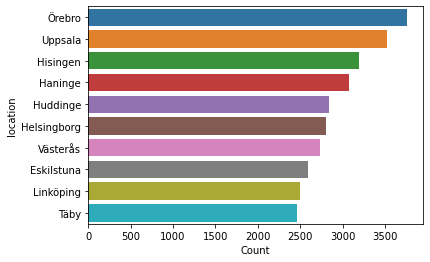

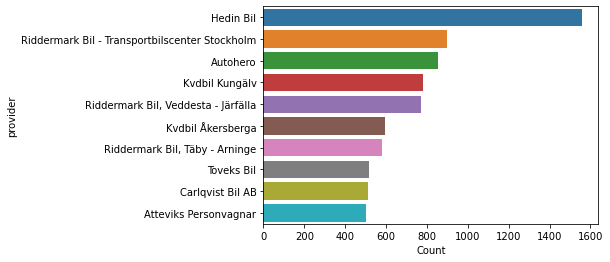

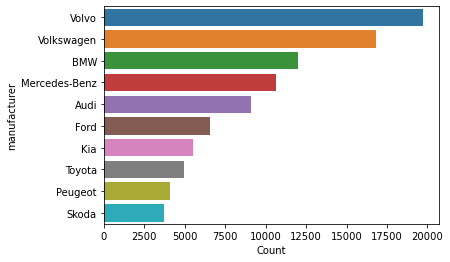

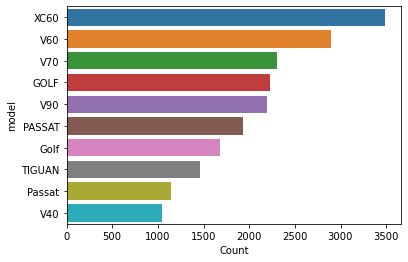

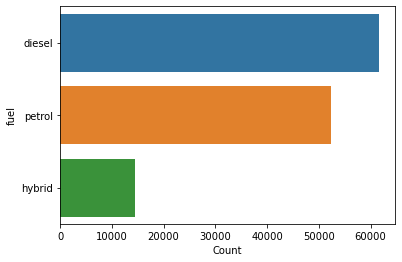

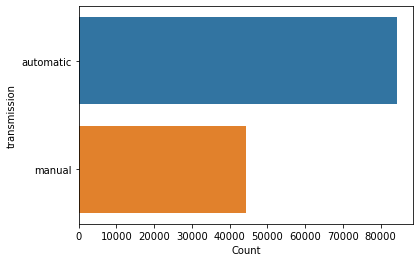

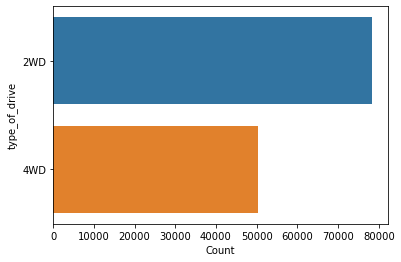

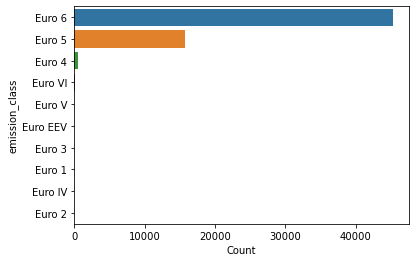

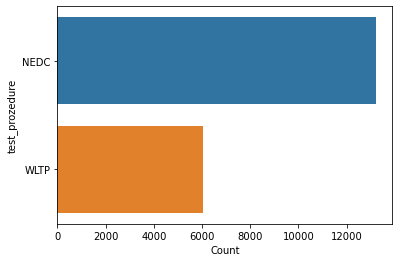

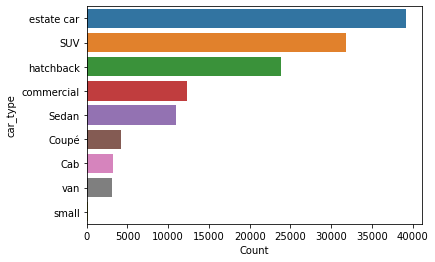

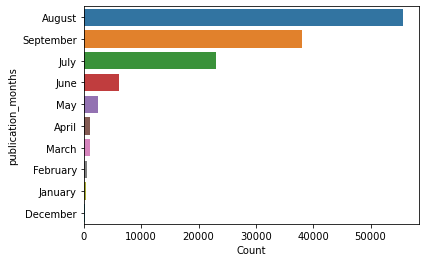

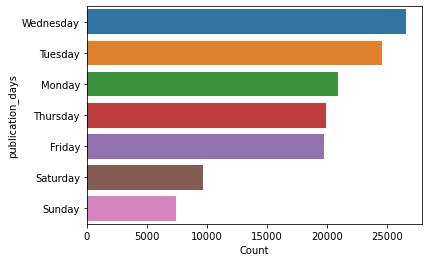

In [13]:
for i , c in enumerate(obj_columns_n):
    df_brief = df_ne[c].value_counts().to_frame(name='Count').reset_index().rename(columns={'index': c})
    sns.barplot(data=df_brief.head(10), y =c , x='Count')
    plt.show()

In [14]:
numeric_columns = df_ne.select_dtypes(include='number').columns
#numeric_columns_n = df.select_dtypes(include=['int64' , 'float64']).columns

numeric_columns 

Index(['Unnamed: 0', 'price_sek', 'entry_year', 'mileage_km', 'horse_power',
       'engine_size_ccm', 'top_speed_km_h', 'co2_emission_g/km',
       'fuel_consumption_mixed_l_100km', 'fuel_consumption_highway_l_100km',
       'electric_range_km', 'number_of_seats', 'length_mm', 'width_mm',
       'height_mm', 'load_capacity_kg', 'empty_weight_kg', 'total_weight_kg',
       'publication_hours', 'publication_minutes'],
      dtype='object')

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


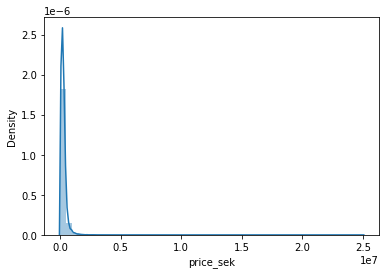

In [15]:
sns.distplot(df_ne['price_sek'], kde=True)
plt.show()

In [16]:
'''from price-sek displot we can easily find out that in all columns we have many 
outliers ; So for any further analysing we need to remove noise datas first.''' 

d = ['Unnamed: 0' ,'electric_range_km']
cl = numeric_columns.drop(d , errors='ignore')
dnd=pd.DataFrame() #dnd stands for deleted noise dataset 
def  delete_noise_datas(df_dn ,  q1p , q2p):
    for col in cl:
        q1 = np.nanpercentile(df_ne[col], q1p , axis=0)
        q2 = np.nanpercentile(df_ne[col], q2p , axis=0)
        dnd[col]=df_dn[ df_dn[col].between(q1 , q2)][col]
    return dnd


In [17]:
dnd = delete_noise_datas(df_ne ,  10 , 90 )
dnd.head()

,price_sek,entry_year,mileage_km,horse_power,engine_size_ccm,top_speed_km_h,co2_emission_g/km,fuel_consumption_mixed_l_100km,fuel_consumption_highway_l_100km,number_of_seats,length_mm,width_mm,height_mm,load_capacity_kg,empty_weight_kg,total_weight_kg,publication_hours,publication_minutes
1,79500,2011.0,68240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,309900,NaN,130180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,186400,2022.0,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,179000,2016.0,145000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
5,342500,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


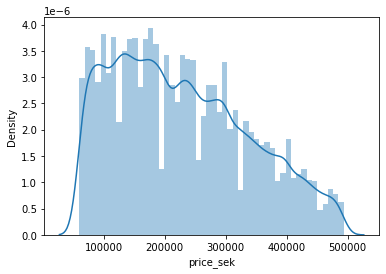

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


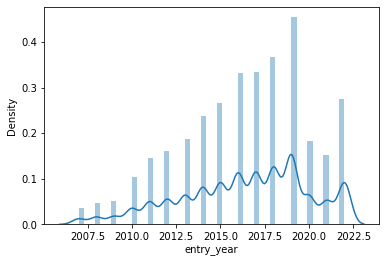

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


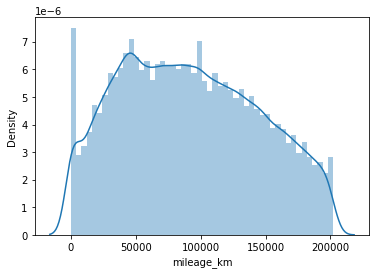

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


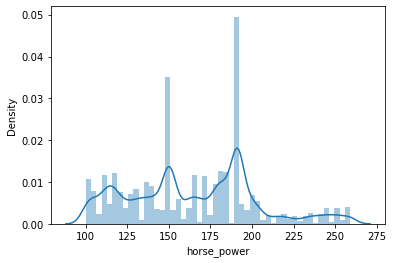

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


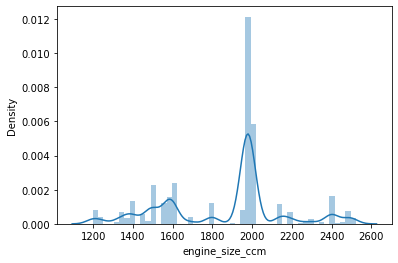

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


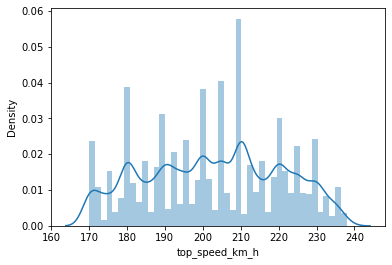

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


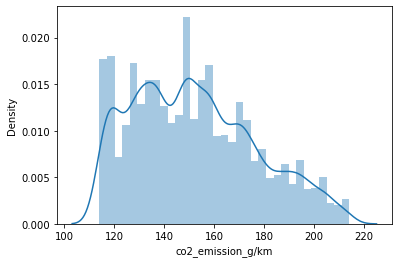

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


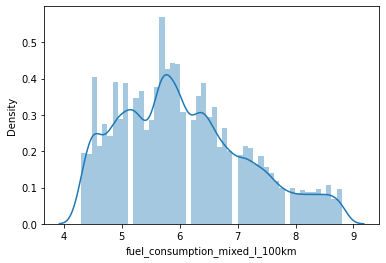

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


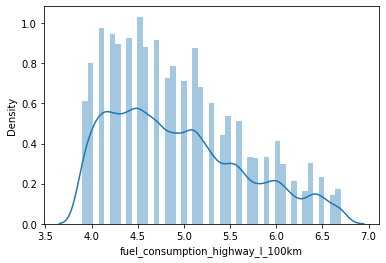

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


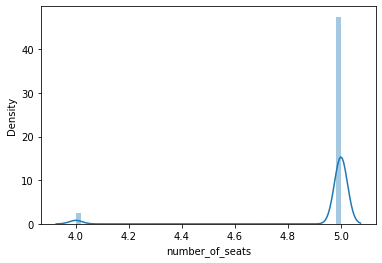

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


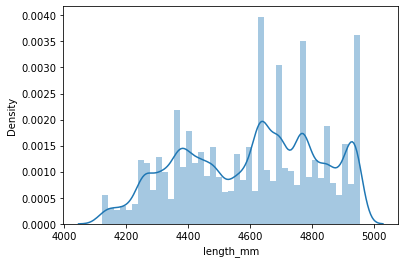

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


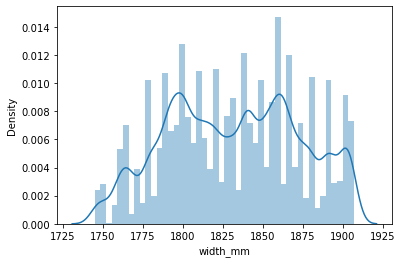

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


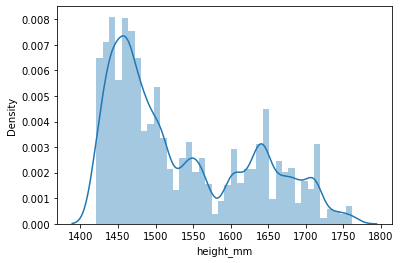

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


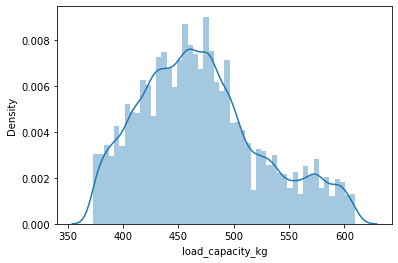

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


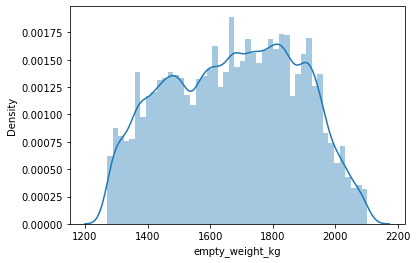

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


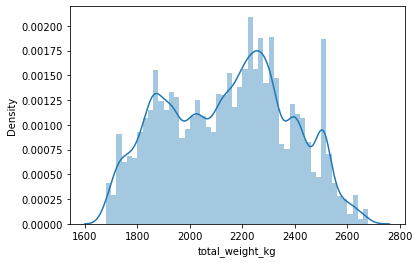

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


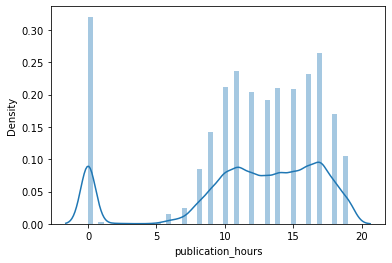

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


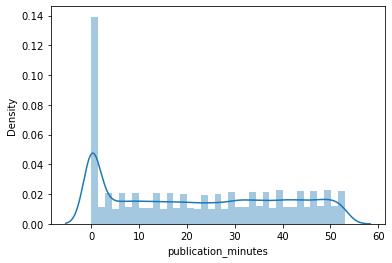

In [18]:
for column in cl:
    sns.distplot(dnd[column], kde=True)
    plt.show()

In [19]:
'''AS our dataset df_ne comprises columns with continuous datas by outliers , 
the best method for correlation is Kendall's Tau '''  

dfne_corrK = df_ne.corr( method='kendall')
dfne_corrK

,Unnamed: 0,price_sek,entry_year,mileage_km,horse_power,engine_size_ccm,top_speed_km_h,co2_emission_g/km,fuel_consumption_mixed_l_100km,fuel_consumption_highway_l_100km,electric_range_km,number_of_seats,length_mm,width_mm,height_mm,load_capacity_kg,empty_weight_kg,total_weight_kg,publication_hours,publication_minutes
Unnamed: 0,1.000000,-0.000181,-0.005375,0.022432,0.003467,-0.004006,-0.007220,-0.005413,-0.043311,-0.008619,0.079749,0.013819,0.005509,0.011937,0.006324,0.006307,0.012975,0.013239,0.168511,0.126696
price_sek,-0.000181,1.000000,0.584167,-0.473879,0.402802,0.210196,0.277747,0.218152,0.062197,0.083626,-0.282902,0.039617,0.242357,0.385916,0.044912,0.034829,0.400715,0.345074,-0.052696,-0.055879
entry_year,-0.005375,0.584167,1.000000,-0.636724,0.082490,-0.095541,0.066339,-0.022394,-0.075754,-0.147941,0.103427,0.070931,0.014095,0.153514,0.008075,-0.042010,0.129190,0.103056,-0.079803,-0.074566
mileage_km,0.022432,-0.473879,-0.636724,1.000000,-0.006765,0.156248,-0.013164,0.031551,0.039421,0.113999,-0.038679,0.020121,0.126641,0.003089,0.056123,0.172538,0.036693,0.074093,0.082804,0.071833
horse_power,0.003467,0.402802,0.082490,-0.006765,1.000000,0.536077,0.624230,0.412627,0.285095,0.340203,-0.372333,0.081893,0.427685,0.477489,-0.020086,0.119324,0.541028,0.484445,0.004751,-0.012960
engine_size_ccm,-0.004006,0.210196,-0.095541,0.156248,0.536077,1.000000,0.323666,0.418182,0.276031,0.379721,0.143773,0.007732,0.422929,0.397708,0.089384,0.179195,0.501154,0.466404,0.009954,0.005143
top_speed_km_h,-0.007220,0.277747,0.066339,-0.013164,0.624230,0.323666,1.000000,0.180542,0.143359,0.126016,-0.368761,0.090737,0.265562,0.234842,-0.312376,-0.000842,0.253700,0.209382,0.014161,-0.018944
co2_emission_g/km,-0.005413,0.218152,-0.022394,0.031551,0.412627,0.418182,0.180542,1.000000,0.653054,0.746775,-1.000000,-0.025451,0.312155,0.323695,0.205764,0.182166,0.384681,0.365029,-0.005672,0.002498
fuel_consumption_mixed_l_100km,-0.043311,0.062197,-0.075754,0.039421,0.285095,0.276031,0.143359,0.653054,1.000000,0.737501,-0.647937,-0.021850,0.166496,0.165625,0.141668,0.132116,0.176911,0.173657,-0.022505,-0.010330
fuel_consumption_highway_l_100km,-0.008619,0.083626,-0.147941,0.113999,0.340203,0.379721,0.126016,0.746775,0.737501,1.000000,NaN,-0.031637,0.252889,0.253246,0.251483,0.180605,0.306820,0.298985,-0.001754,0.005634


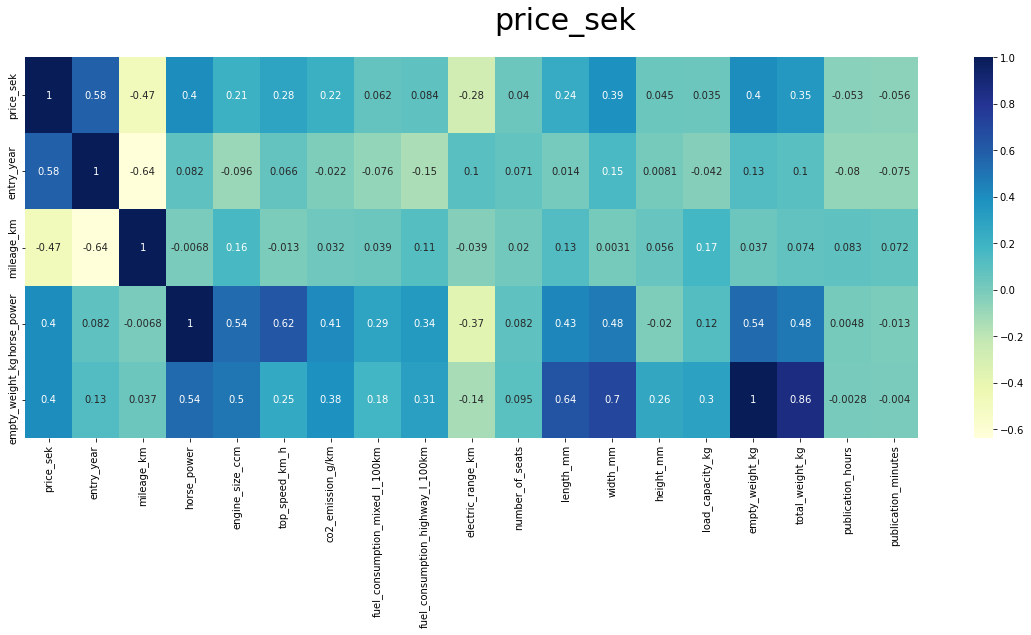

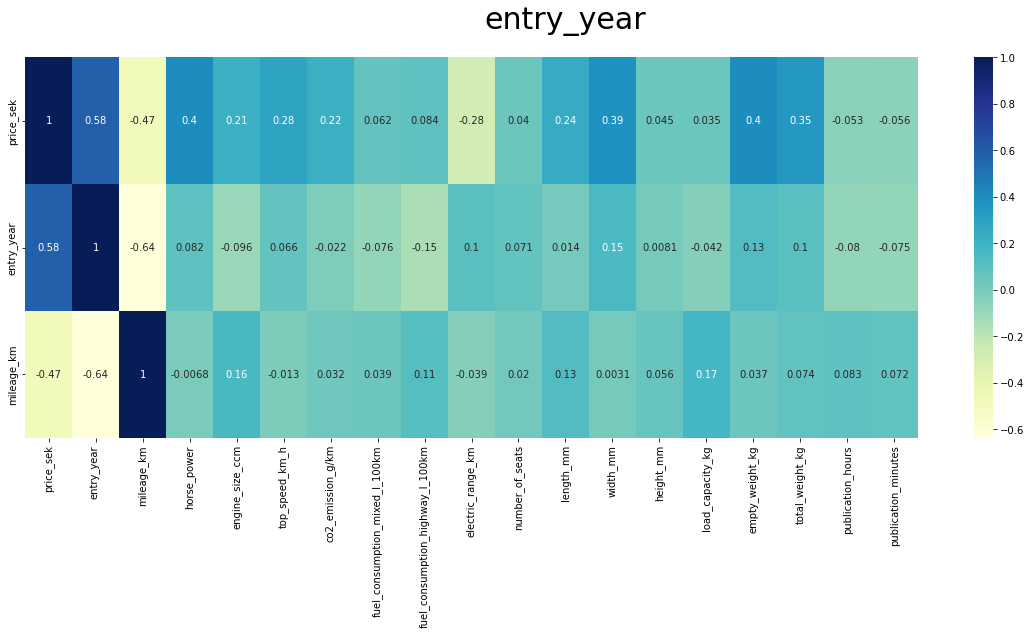

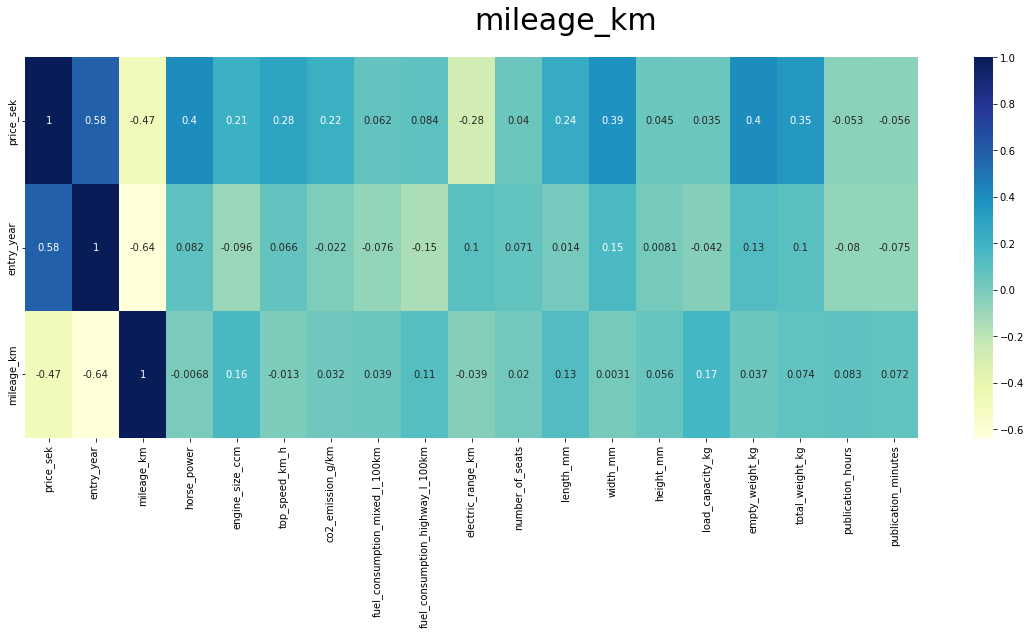

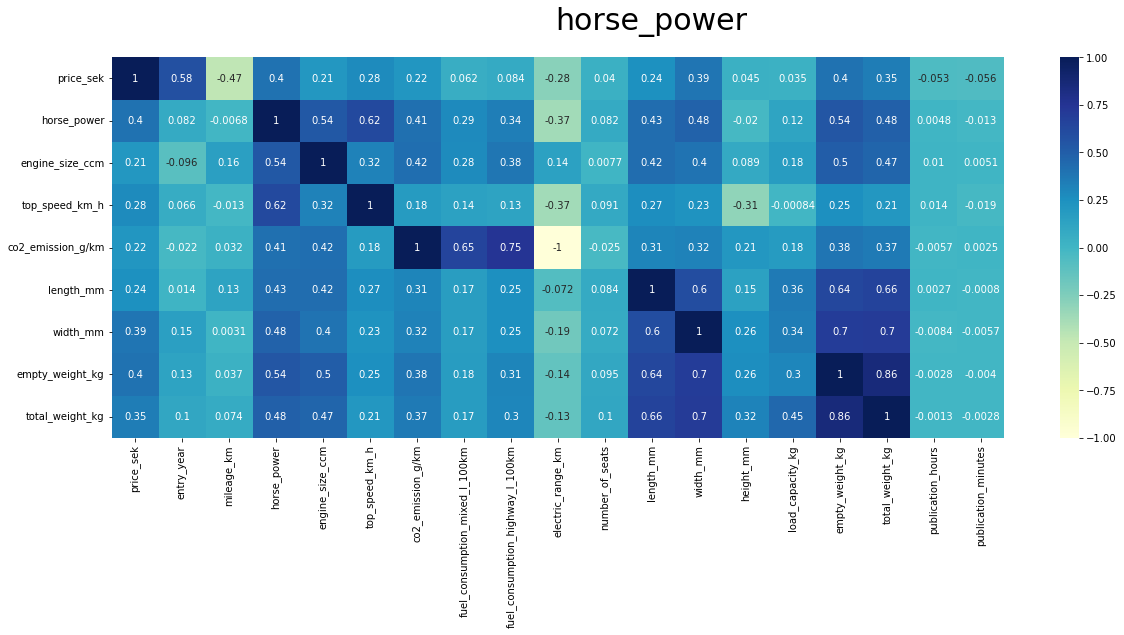

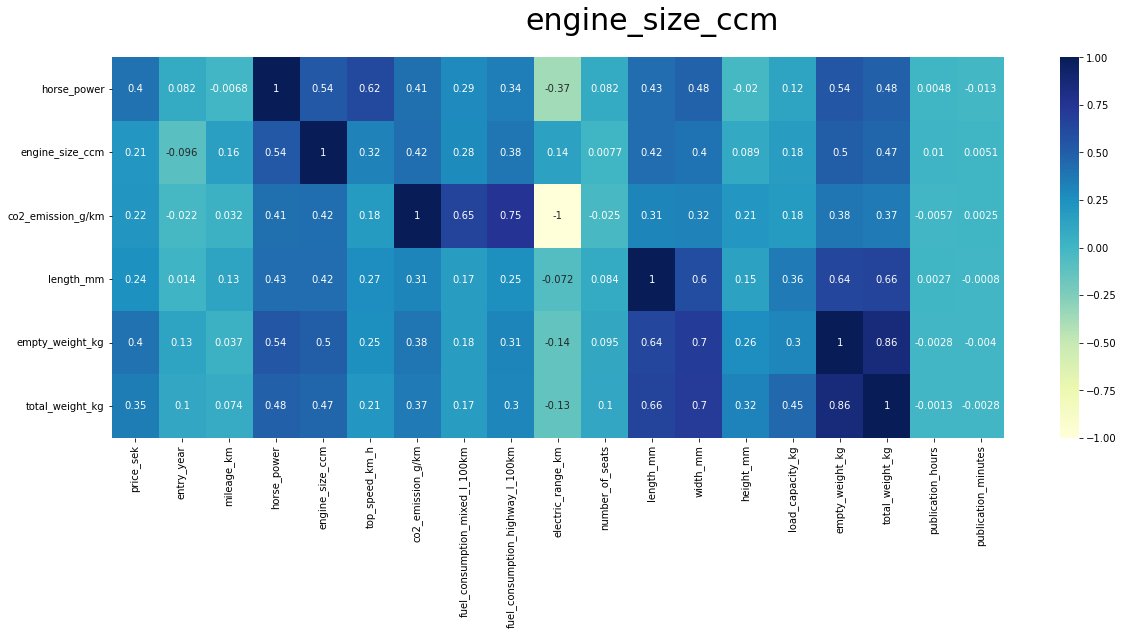

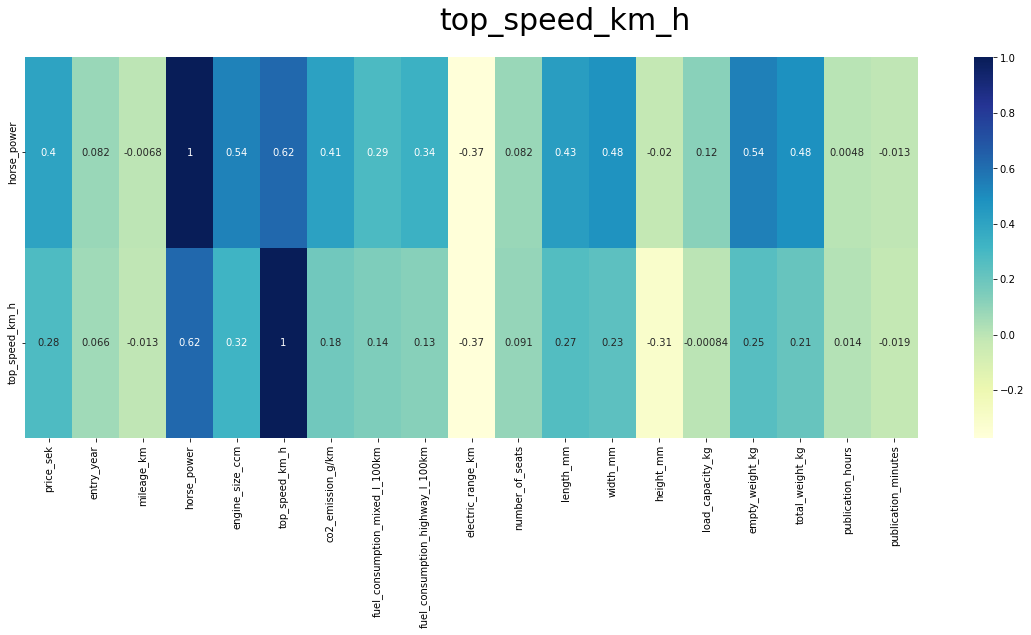

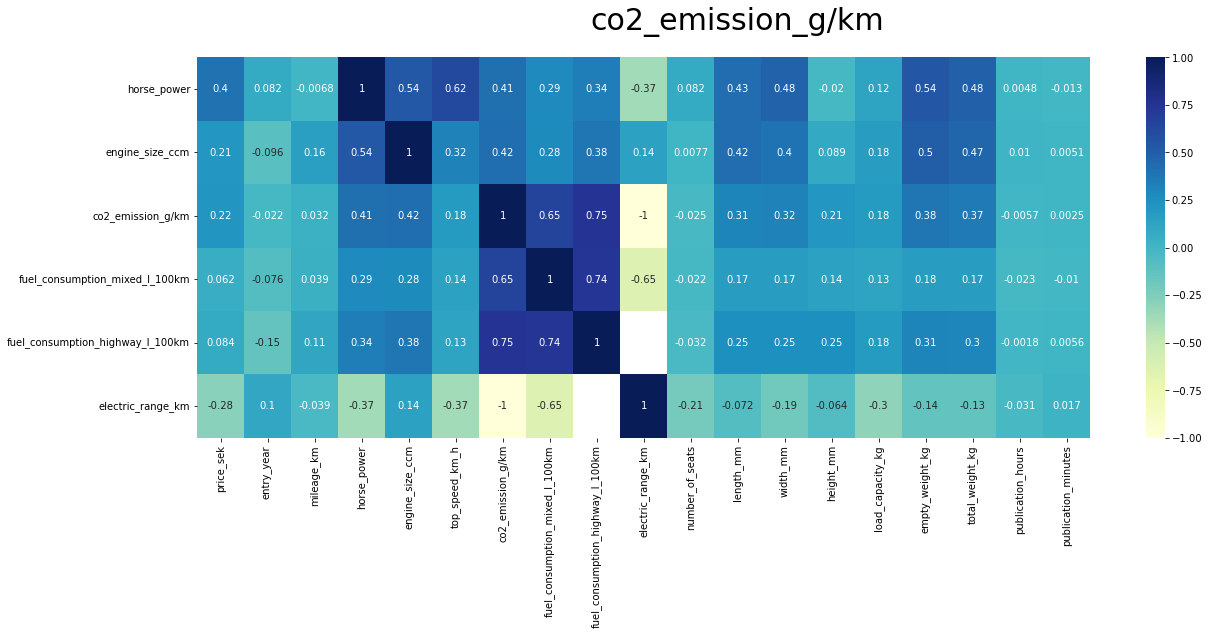

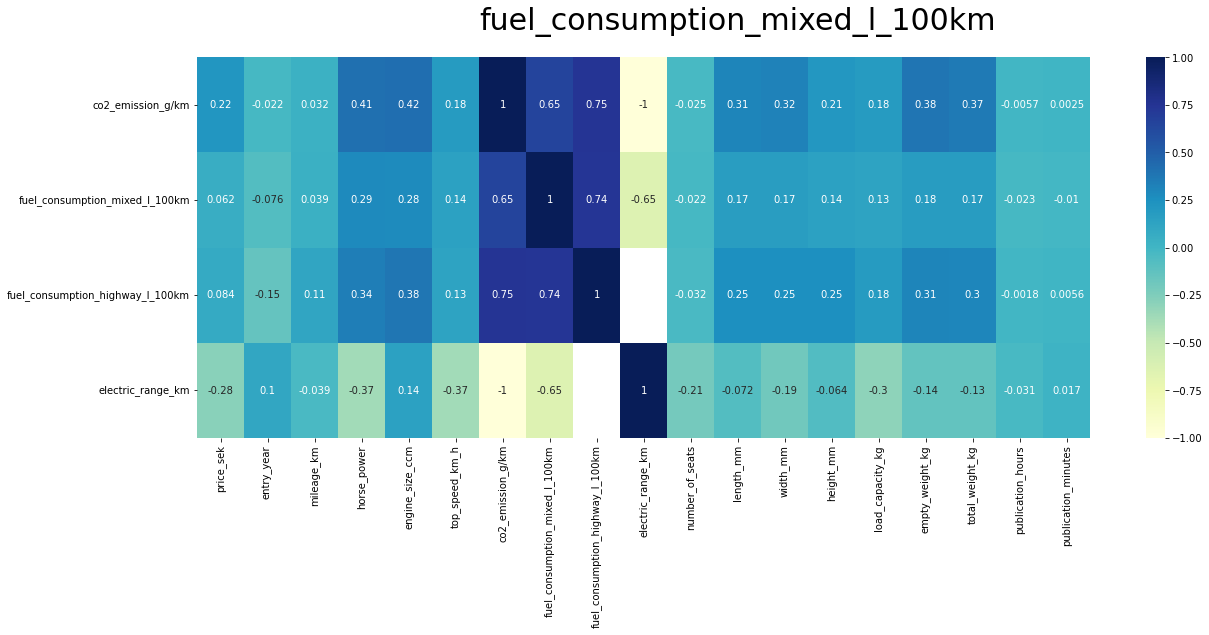

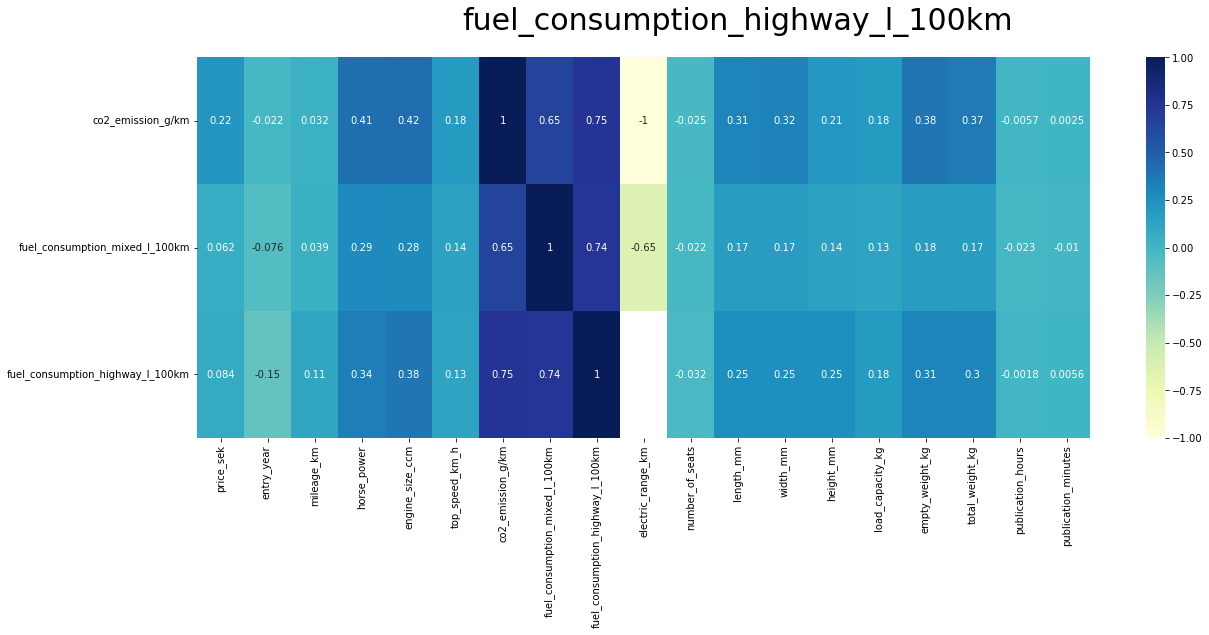

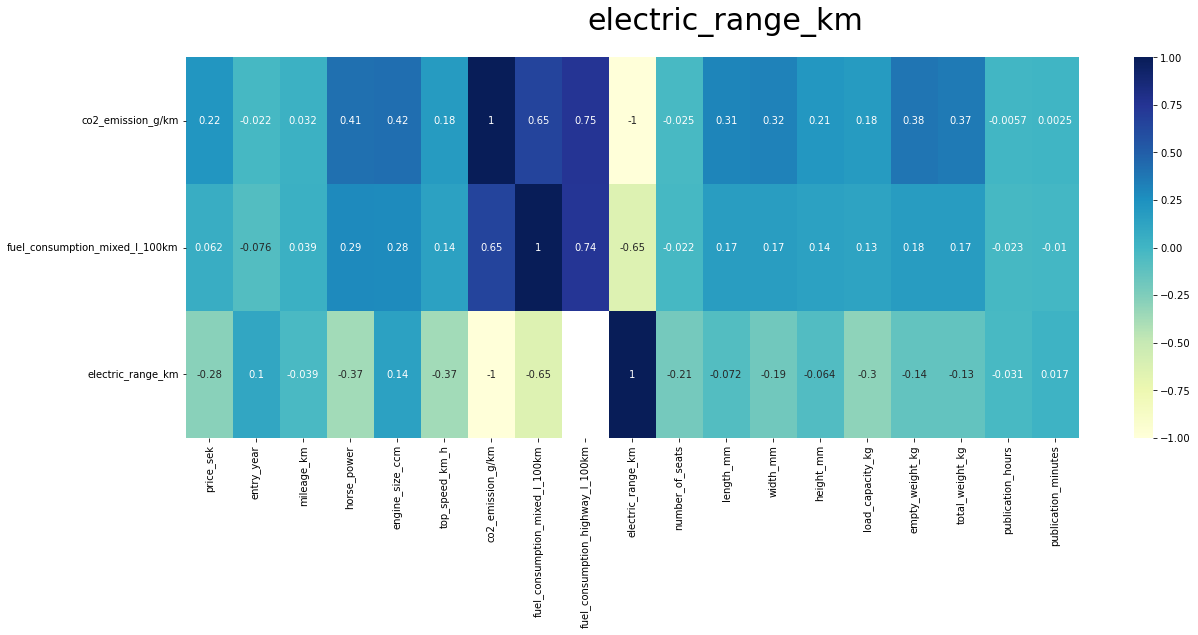

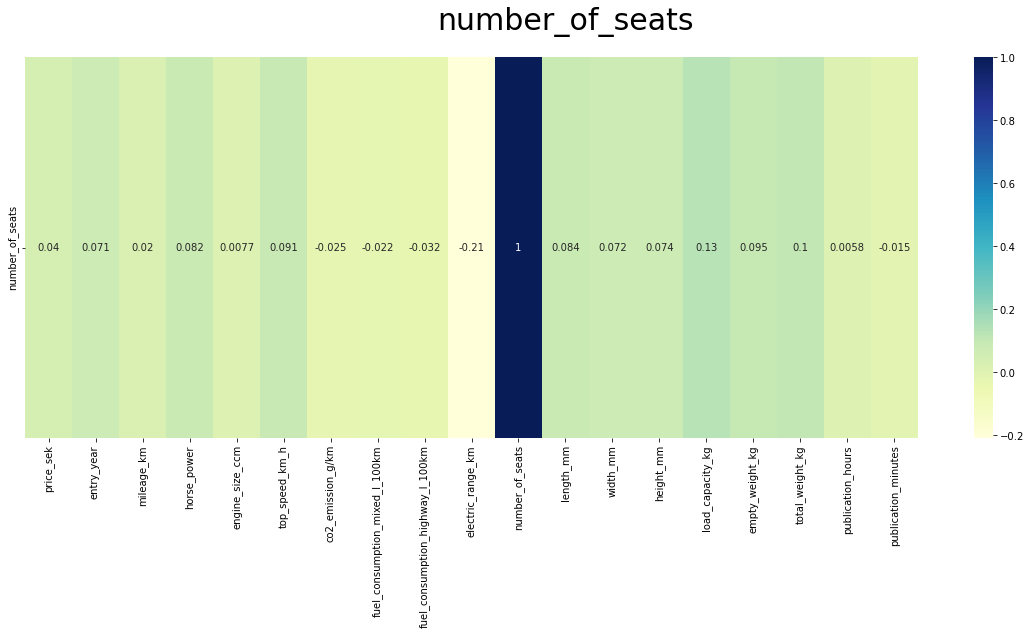

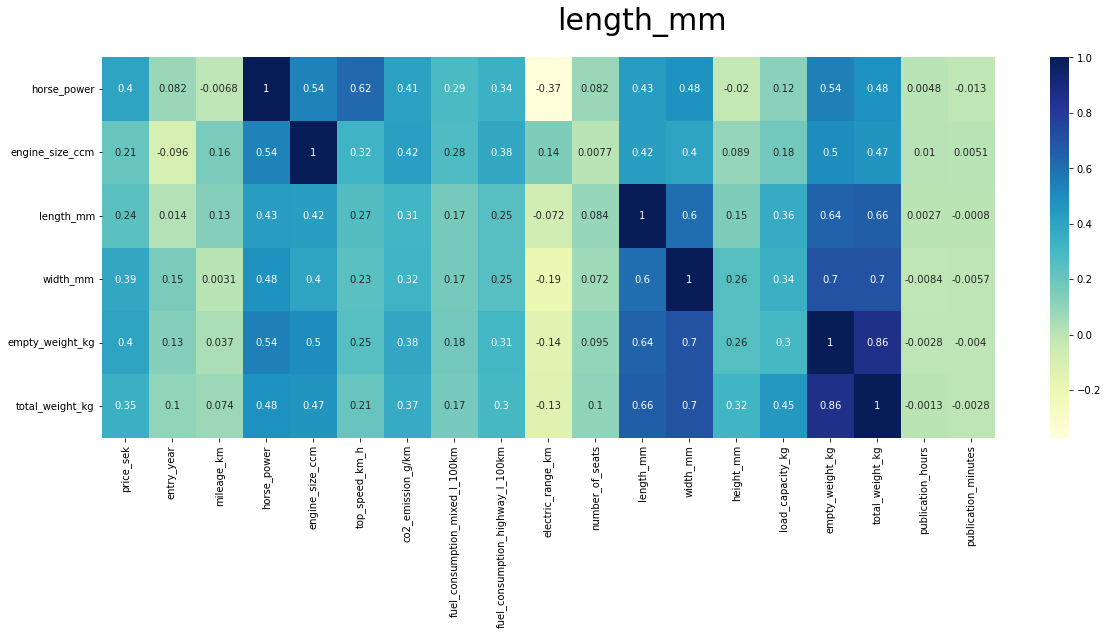

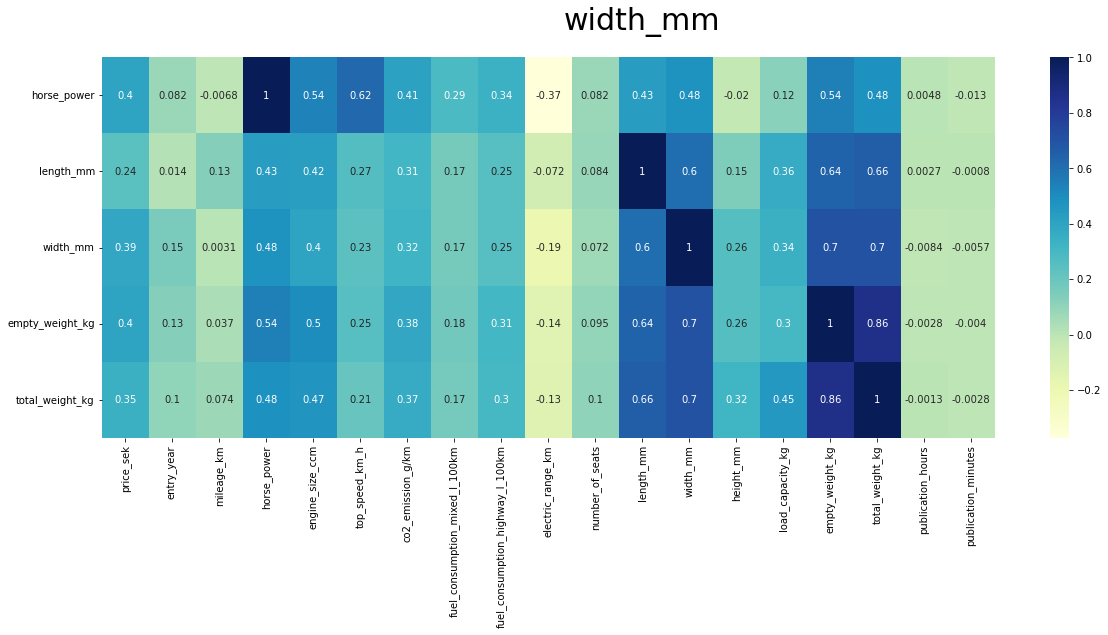

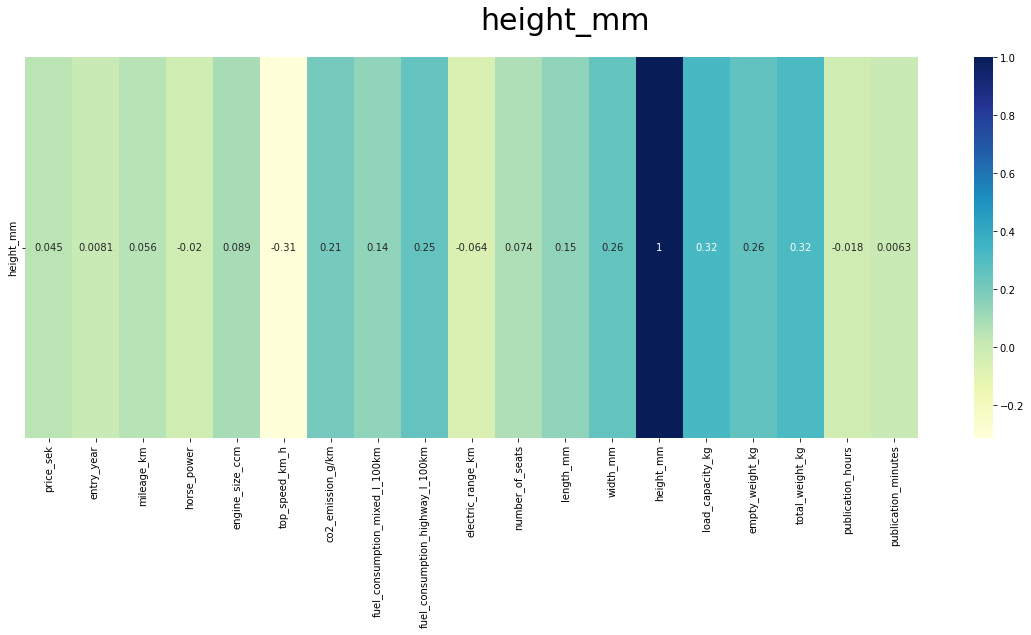

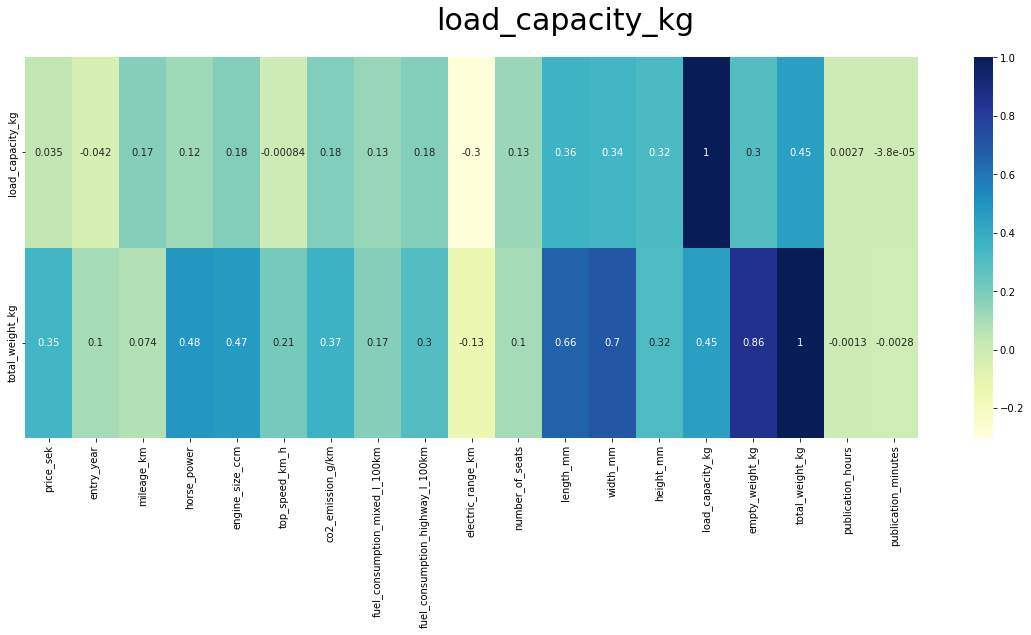

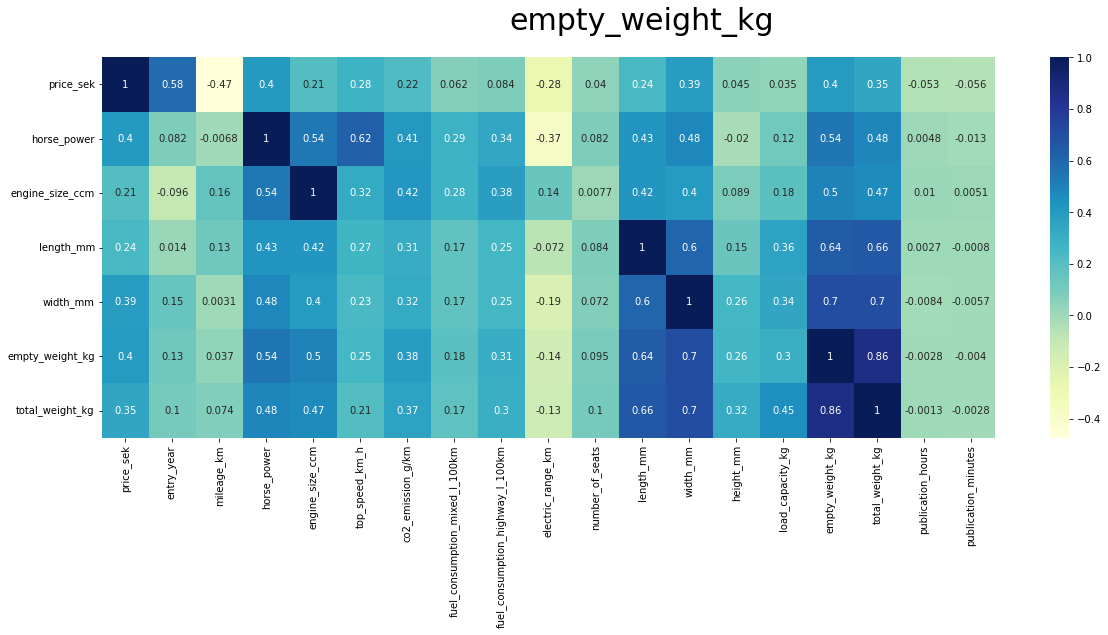

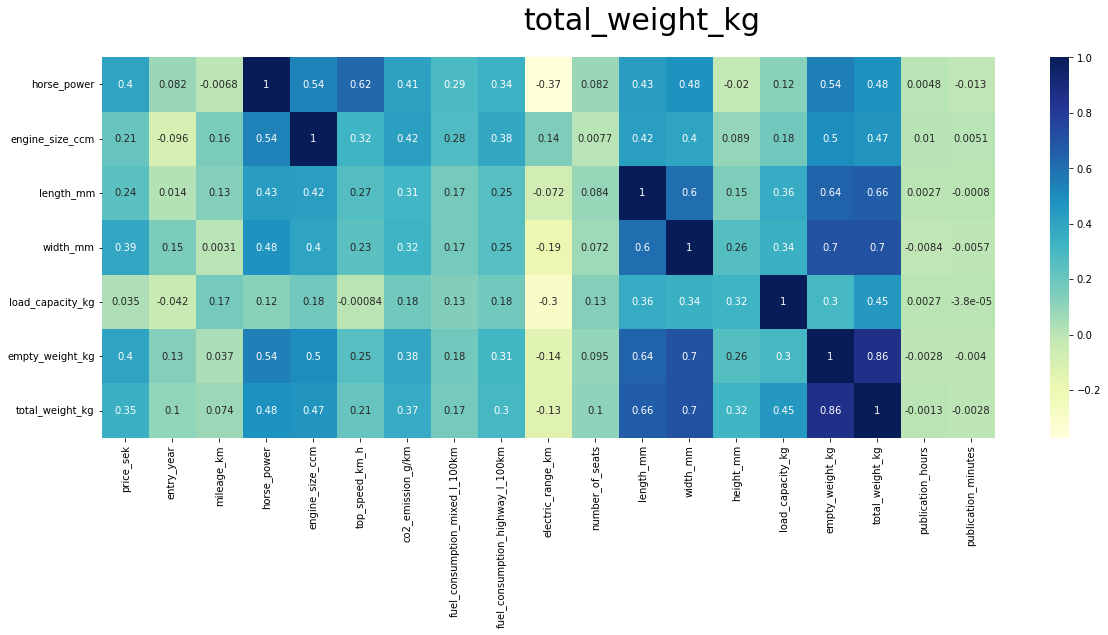

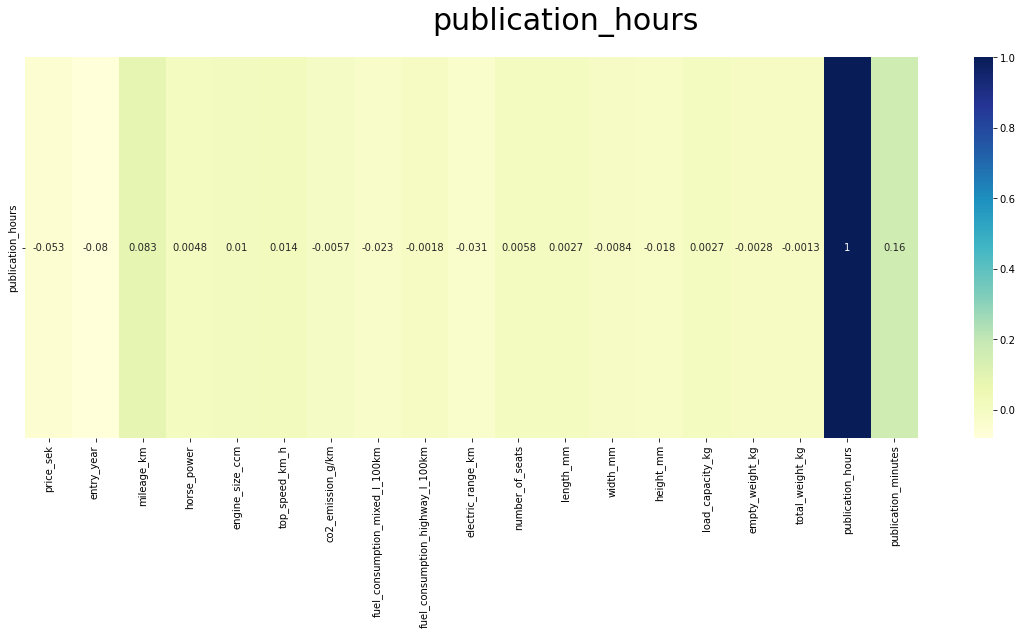

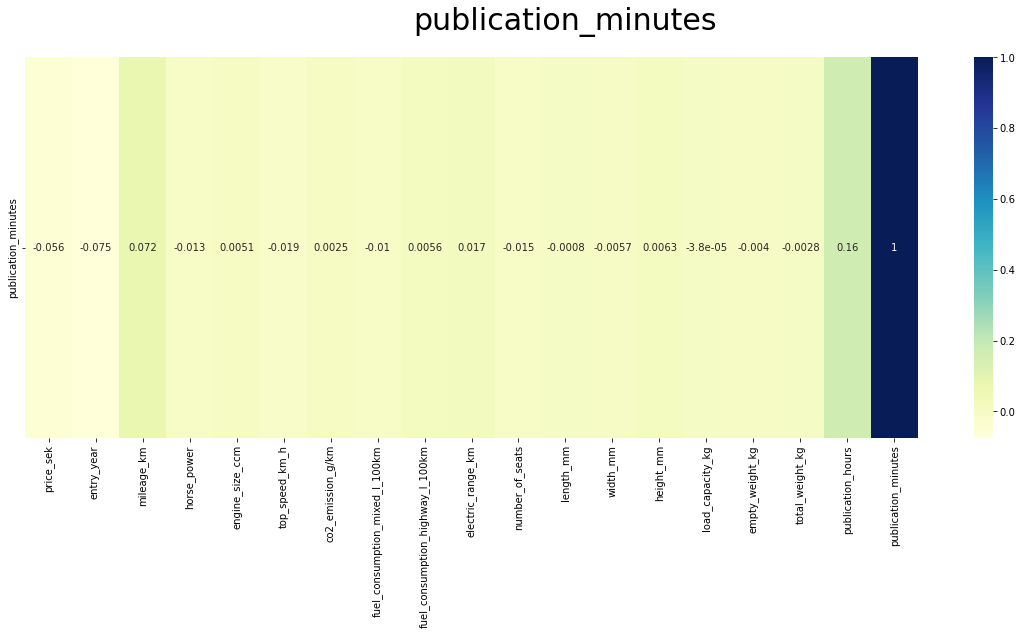

In [20]:
dfne_corrK.drop('Unnamed: 0', inplace=True, axis=1)
for col in dfne_corrK.columns  :
    d = dfne_corrK.loc[abs(dfne_corrK[col])>0.4]
    plt.figure(figsize =(20,7))
    plt.suptitle(col , fontsize =30)
    sns.heatmap(d ,cmap = 'YlGnBu' , annot = True)

there are some obvious conclusion that we can exrtact from heat maps of correlations :

### 1-  price :
    
- Price has -0.47 corr with 'mileage'  ,the more mileage cars have the 
less worth are.
     
- cars with more horsepower are more pricey , as we see , price has the correlation of 0.4 with HP(horsepower).
    
- vehicle's weight can be a factor into its price .heavy car may end up costing you more , even for used cars . price with 0.4 correlation of empty_weight is demonstrating this result.

### 2- horse_power(HP)

- as the amount of power that engine produces is so relevant to 
    car's engine size(r = 0.54 ).
    
- Besides , the higher HP leads to higher top speed with 0.62 correlation.
    
- Also if we notice , car manufacturers in engine designing have considered higher HP for heavier vehicles  , because empty_weight has 0.54 correlation with horse power.
    
- car with larger dimensions in width and length , have equipped with more horsepower by reason of producing faster accelerate and  heavier loads for bigger cars ; width and length features have 0.48 , 0.43 correlation with horsepower , respectively.

### 3- entry_year

- unlike the common belief in many countries , from this dataset we can conclude in Sweden the entry_year isn't so effective  the price .

### 4- CO2_emission 

- the correlation between engine_size and co2_emission is aproximately medium_size (r = 0.42)
     
- the larger an engine is, the more fuel it will use therefore the more emissions it will produce
     
- The amount of CO2 a car emits is directly related to the amount of fuel it consumes, as we have high correlation between fuel_consumption and  co2_emission (r= 0.75).

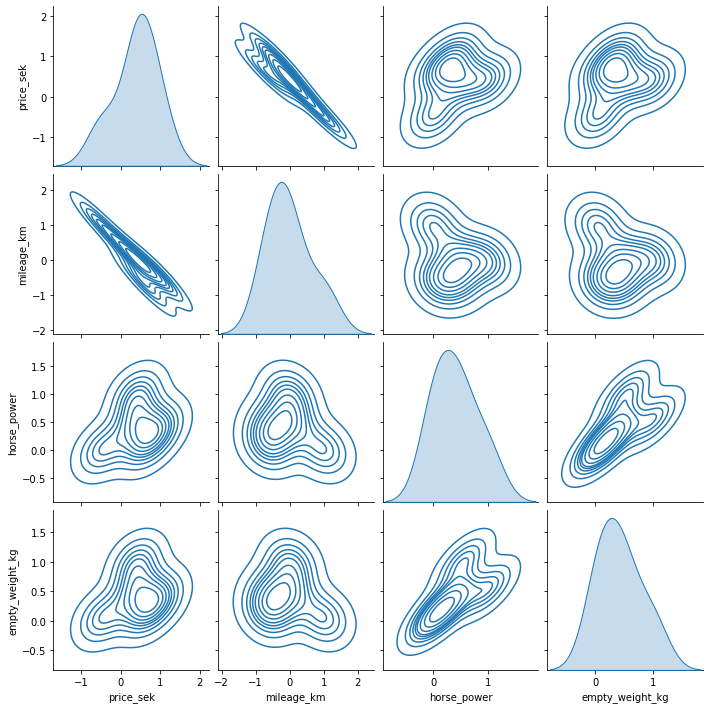

In [21]:
d_price =  dfne_corrK[abs(dfne_corrK['price_sek'])>0.4][['price_sek', 'mileage_km' , 'horse_power' ,'empty_weight_kg']]

sns.pairplot(d_price , kind="kde") 

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


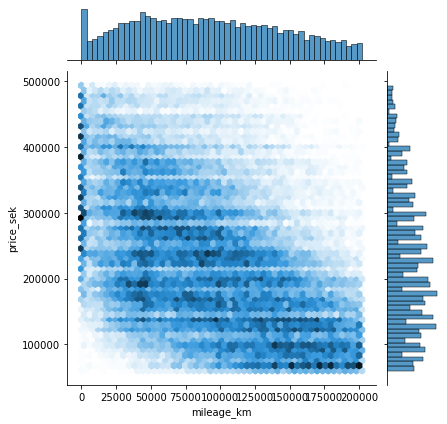

In [22]:
sns.jointplot(dnd['mileage_km'] , dnd['price_sek'] , kind= 'hex')

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


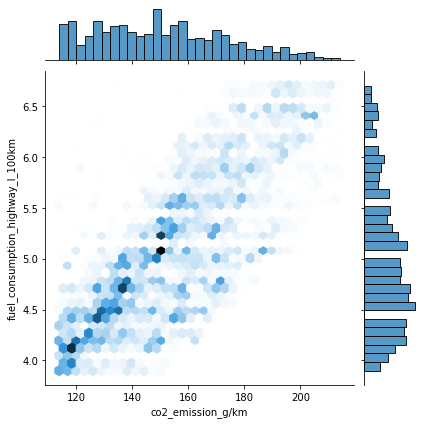

In [23]:
sns.jointplot(dnd['co2_emission_g/km'] , dnd['fuel_consumption_highway_l_100km'] , kind= 'hex')

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


' beautiful plot "price through years" depicts the older cars \nare small number with less price , The newer the cars, the higher the prices by 2018 ,\nwe have less car by entry-year after 2018 due to they\'re steal new and people want to\nuse them rather than selling , of course.\n'

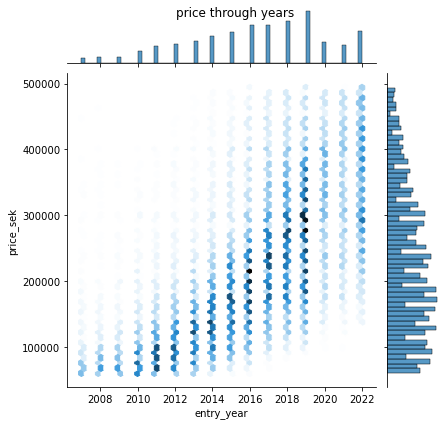

In [24]:
p=sns.jointplot(dnd['entry_year'] , dnd['price_sek'] , kind= 'hex')
p.fig.suptitle("price through years")
''' beautiful plot "price through years" depicts the older cars 
are small number with less price , The newer the cars, the higher the prices by 2018 ,
we have less car by entry-year after 2018 due to they're steal new and people want to
use them rather than selling , of course.
'''

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transmission', ylabel='price_sek'>

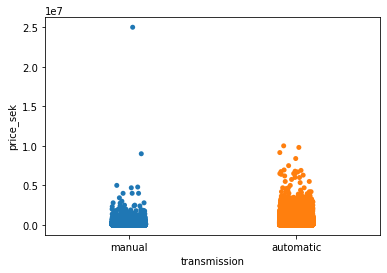

In [25]:
# let's go through some categorical columns base on some numerical columns

sns.stripplot(df_ne['transmission'] , df_ne['price_sek'])



C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(-42250.0, 887250.0)]

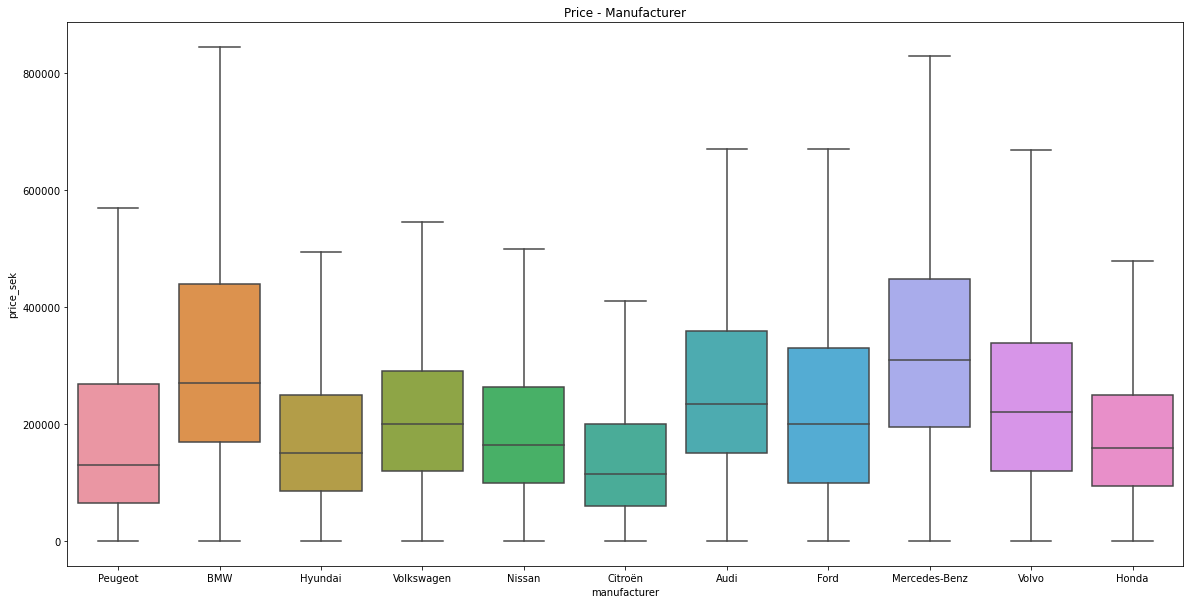

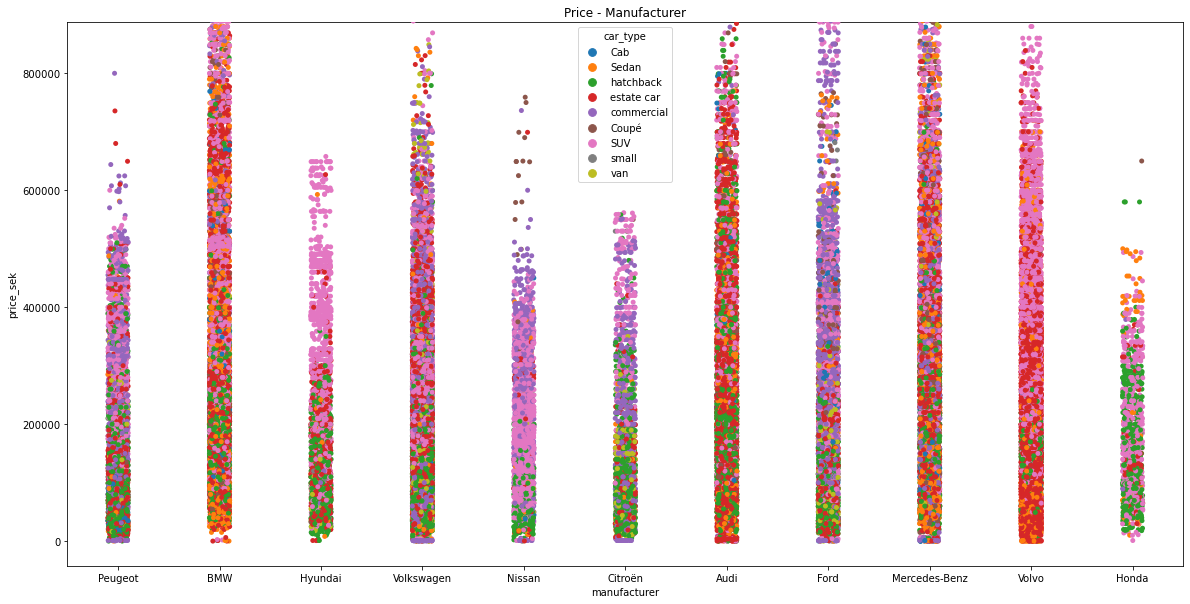

In [26]:
m1 = ['Peugeot',  'BMW', 'Hyundai', 'Volkswagen', 'Nissan',
       'Citroën', 'Audi', 'Ford', 'Mercedes-Benz', 'Volvo' ,'Honda']
topmodels =df_ne[df_ne['manufacturer'].isin(m1)]

plt.figure(figsize =(20,10))
plt.title("Price - Manufacturer")
ax = sns.boxplot(topmodels['manufacturer'], topmodels['price_sek'], showfliers=False)
ylims=ax.get_ylim()

plt.figure(figsize =(20,10))
plt.title("Price - Manufacturer")
ax = sns.stripplot(topmodels['manufacturer'], topmodels['price_sek'] , hue =  topmodels['car_type'])
ax.set(ylim=ylims)



INTERPRETATION OF 'Price - Manufacturer' PLOT:

1- Boxplot of topmodels of used_Cars based on prices ,maximum quartiles arguably show super-luxury cars ,so 'BMW', 'Mercedes-Benz' have the most number of super cars and unquestionably more pricy in average .

2- French manufacturers (Peugeot , Citroen ) models worth less on average.

3- Respecting 'car types' the diversity among German brands is great in the used car market.

4- SUV type is the most expensive vehicle in VOLVO , Hyundai brands .


C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Co2_emission - Manufacturer')

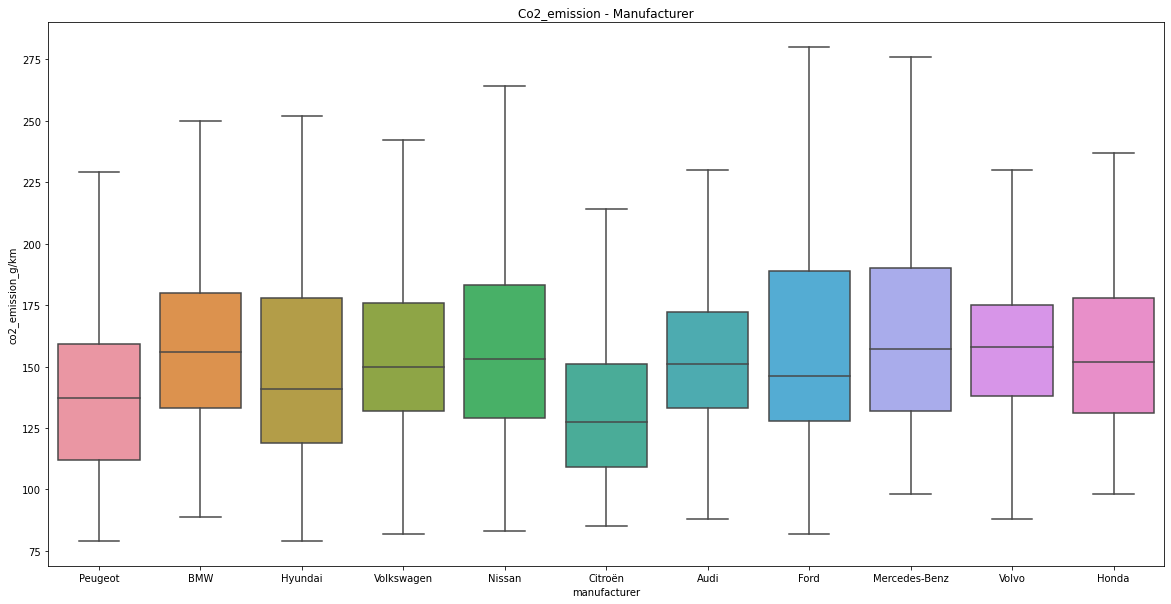

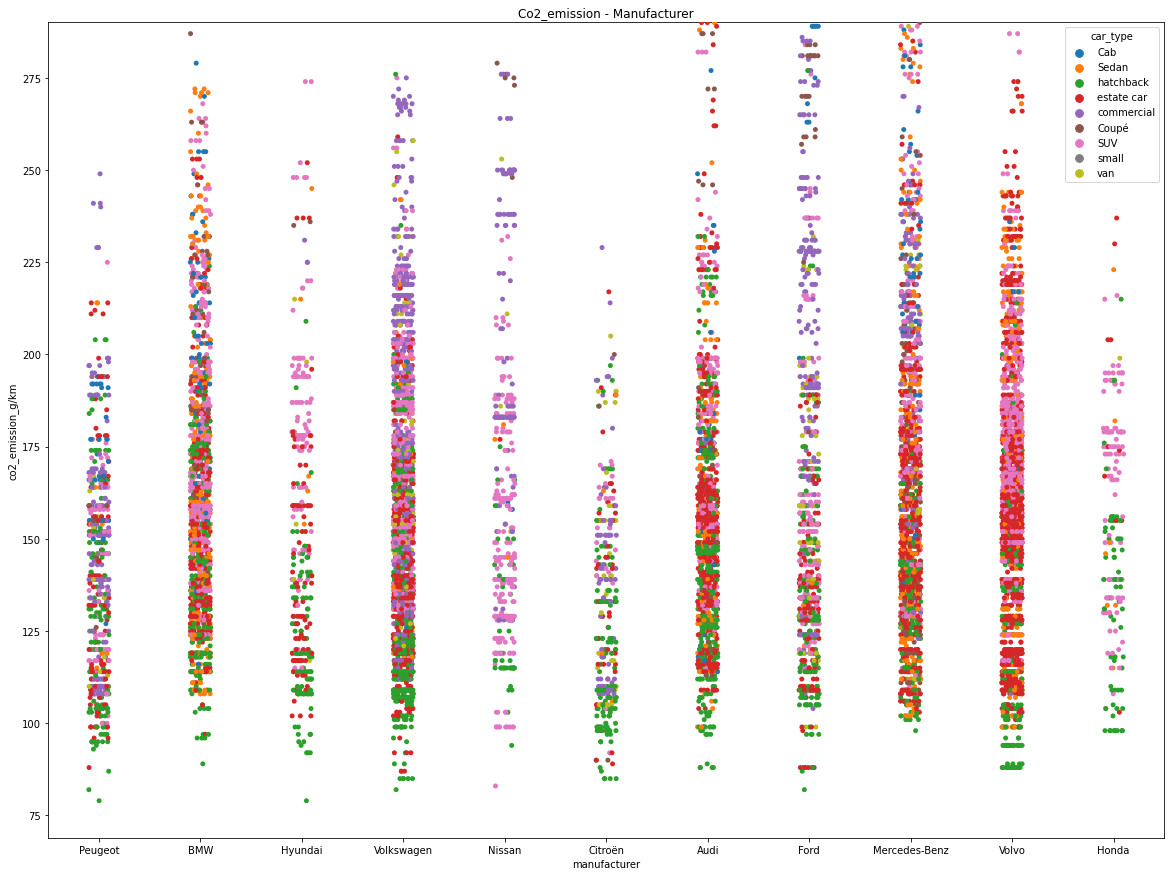

In [28]:
plt.figure(figsize =(20,10))
ax = sns.boxplot(topmodels['manufacturer'], topmodels['co2_emission_g/km'], showfliers=False)
ylims=ax.get_ylim()
plt.title("Co2_emission - Manufacturer")

plt.figure(figsize =(20,15))
ax = sns.stripplot(topmodels['manufacturer'], topmodels['co2_emission_g/km'] , hue =  topmodels['car_type'])
ax.set(ylim=ylims)
plt.title("Co2_emission - Manufacturer")



INTERPRETATION OF 'CO2 emission - Manufacturer' PLOT:

1 - As we can see 'hatchback' models is best low emission cars(green points)

2 - On average 'commercial' models has more CO2 emission among non electrics


C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Engine_size - Manufacturer')

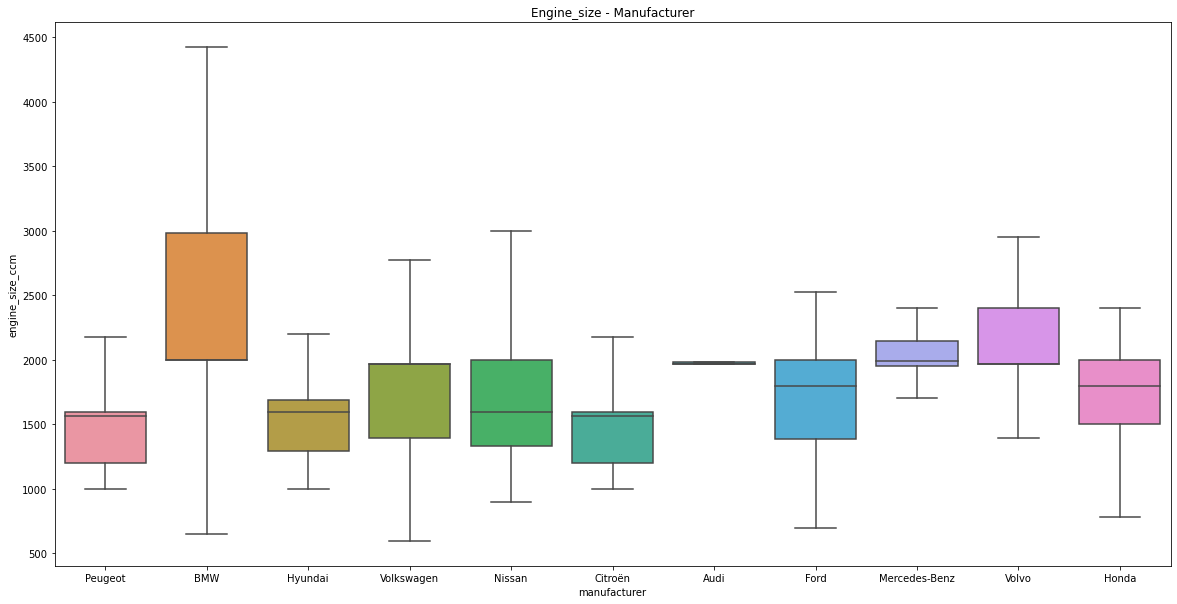

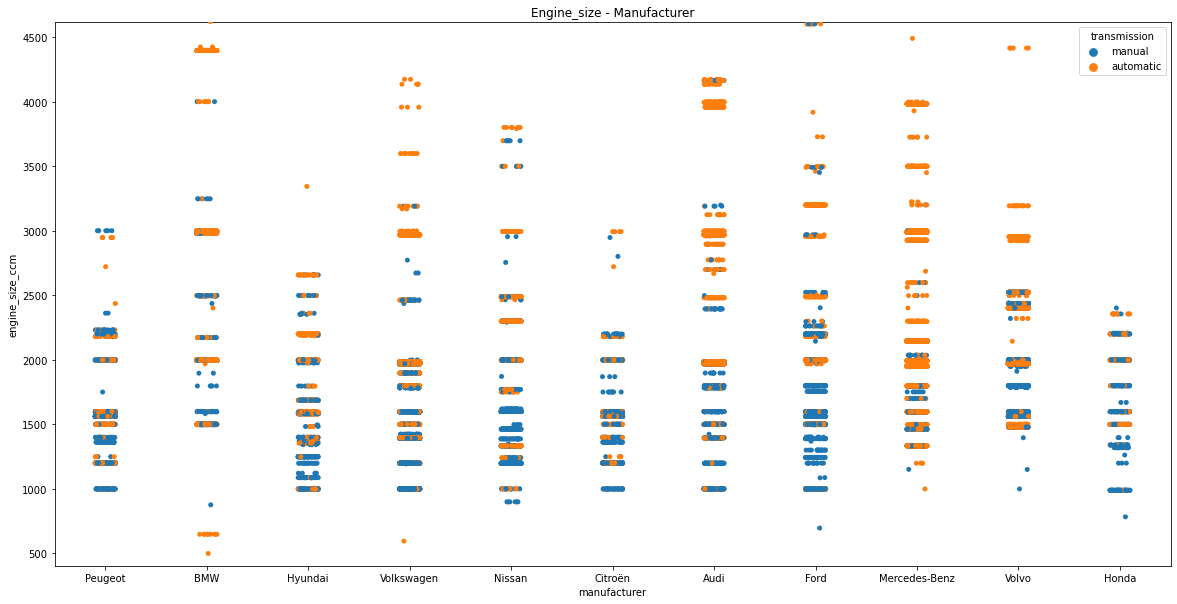

In [30]:
plt.figure(figsize =(20,10))
ax = sns.boxplot(topmodels['manufacturer'], topmodels['engine_size_ccm'], showfliers=False)
ylims=ax.get_ylim()
plt.title("Engine_size - Manufacturer")


plt.figure(figsize =(20,10))
ax = sns.stripplot(topmodels['manufacturer'], topmodels['engine_size_ccm'] , hue =  topmodels['transmission'])
ax.set(ylim=ylims)
plt.title("Engine_size - Manufacturer")



INTERPRETATION OF 'Engine_size - Manufacturer' PLOT:

1 - By far BMW used cars' engine are bigger in comparison with others after that VOLVO possesses big engines

2 - Hues in stripplot demonstrate that in all brands 'automatic' cars have bigger capacity ; which another intersting conclusion we achieved


C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Co2_emission - Manufacturer')

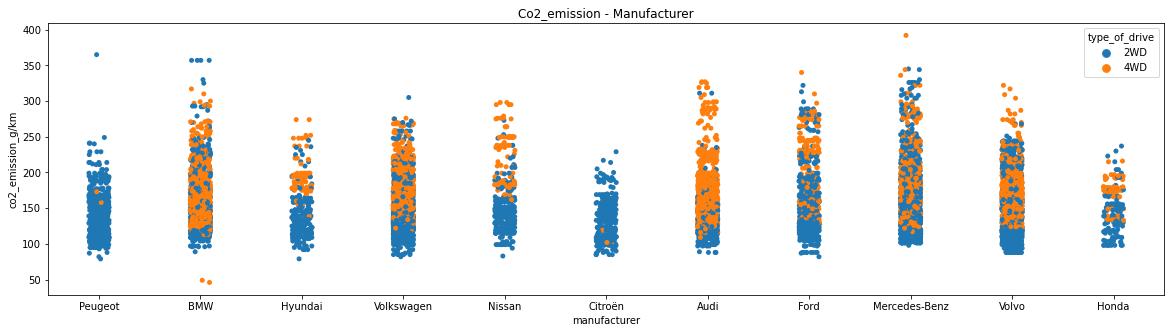

In [31]:
plt.figure(figsize =(20,5))
sns.stripplot(topmodels['manufacturer'] , topmodels['co2_emission_g/km'] ,hue =topmodels['type_of_drive'])
plt.title("Co2_emission - Manufacturer")



INTERPRETATION OF 'Co2_emission - Manufacturer' PLOT:

there is a simple explanation for this striopplot :"In most of the prominent modles , 4WD vehicles emits more CO2 in contrast to 2WDs
